# Block Modelling

### Block Models are used as another way to generate random graphs and networks to simulate other networks such as social media. These are characterised by a partitioning factor that breaks the graphs into noticeable clusters with various probabilities involved.

In this report, we aim to create a block model, and by experimenting with various features of it, we will attempt to create an accurate model to replicate social networks.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from collections import Counter

def block(n, p1, p2, zeta = 0.5):
    groups = []

    while sum(groups) < n:
        ppln = np.random.randint(1, n * zeta)
        if ppln + sum(groups) > n:
            ppln = n - sum(groups)
        groups.append(ppln)
        
    edges = np.random.ranf([n, n])
    edges = (edges + edges.T) / 2
    targets = edges.copy()
    targets = targets < (p2*2)
    group = 0
    node = 0
    while group < len(groups):
        append = edges[node:node+groups[group], node:node+groups[group]] < p1 * 2
        targets[node:node+groups[group], node:node+groups[group]] = append
        node = node + groups[group]
        group +=1
    
    print(f"Number of clusters: {len(groups)}")
    g = nx.from_numpy_matrix(targets)
    return g

Number of clusters: 14
Name: 
Type: Graph
Number of nodes: 500
Number of edges: 12062
Average degree:  48.2480

Global clustering coefficient: 0.840159866351178
Transitivity: 0.8664641296764521
Time taken: 0.05901908874511719


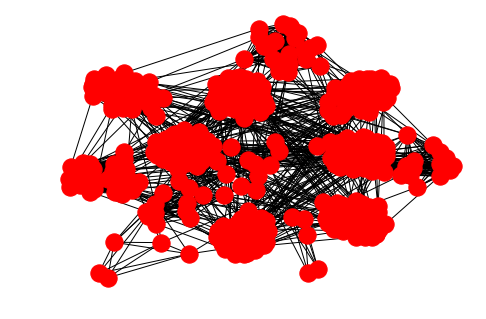

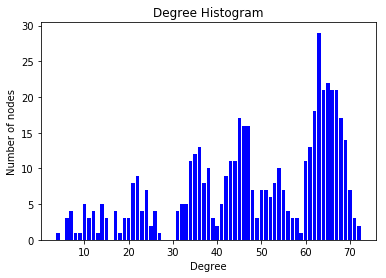

In [35]:
toc = time.time()
g = block(500, 0.4, 0.02, zeta = 0.15)
tic = time.time()
print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
print(f"Time taken: {tic-toc}")
nx.draw(g)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

We have our most basic block model function defined. However, this model is very much incomplete as it lacks several features. One, a variable method of changing the number of clusters in the model. Two, a way to implement preferential attachment in the graph. Three, a process that represents growth and inherent fitness. Four, a process that enables nodes to be part of multiple clusters instead of just one. Five, a method that simulates the growth of networks in reality.

With the use of $\zeta$ in varying the number of clusters, the expected value of clusters $C$, is $ E(C) = \frac {2} {\zeta}$. As such, we will continue to implement the other features.

In [4]:
def norm(mu, std):
    return np.clip(np.random.normal(mu, std),0,1)

def arctan(x):
    return np.arctan(x) / np.pi + 1/2

def block_start(t, gamma, chia, chig, phi, zeta, xi):
    g = nx.Graph()
    g.add_edge(1, 2)
    nodes = 2
    fitness = np.random.ranf(2)
    clusters = [[1, 2]]
    
    def node_add(gamma): 
        num = nodes**0.5 * norm(gamma, gamma / 2)
        start = nodes.copy()
        lim = nodes+num
        nodes = lim.copy()
        return list(range(start, lim))
    
    def node_del(gamma): 
        def delnode(node):
            factor = np.random.ranf(1)
            p = gamma / g.degree(node)
            if factor < p:
                return 1
            return 0
        return list(map(lambda x: x if delnode(x) == 1, range(nodes)))
    
    def cluster_join(chia, cluster):
        
    
    def cluster_act(chia): 
        
        
        return
    
    def cluster_grw(chig): 
    
    def edge_change(zeta, xi): 
    
    def fit_change(phi): 
    
    
    
    for time in range(t):
        nodes_add = node_add(gamma)
        nodes_del = node_del(gamma)
        g.add_nodes_from(nodes_add)
        g.remove_nodes_from(nodes_del)
        cluster_act(chia)
        cluster_shr(chia)
        edges = edge_change(zeta, xi)
        g.add_edges_from(edges[0])
        g.remove_edges_from(edges[1])
        clusters_grw = cluster_grw(chig)
        clusters.extend(clusters_grw)
        clusters_del = cluster_del(chig)
        clusters.pop(clusters_del)
        fitness = fit_change(phi)
        nodes = len(fitness)
        
    return g
        
    

SyntaxError: invalid syntax (<ipython-input-4-fd7d7e425415>, line 28)

In [123]:
def norm(mu, std):
    return np.clip(np.random.normal(mu, std),0,1)

def normnorm(irrelevant):
    return norm(0.5, 0.1)

def arctan(x):
    return np.arctan(x) / np.pi + 1/2

def block_start(t, gamma, kappa, chia, chig, phi, zeta, xi, rho):
    g = nx.Graph()
    g.add_edge(0, 1)
    nodes = 2
    node_a = [0, 1]
    fitness = list(map(normnorm, range(2)))
    clusters = [[0, 1]]
    
    def node_add(gamma): 
        num = int((len(node_a)**0.5 * norm(gamma, gamma / 2))//1)
        return [list(range(nodes, nodes+num)), list(map(normnorm, range(num))), num]
    
    def node_del(gamma): 
        def delnode(node):
            factor = np.random.ranf(1)
            p = ((kappa) ** ((g.degree(node) / len(node_a))+1))
            if factor < p:
                return 1
            return 0
        return list(filter(lambda y: y >=0, list(map(lambda x: x if delnode(x) == 1 else -1, node_a))))
    
    def edge_change(zeta, xi):
        node_s = 0
        
        def pcalc_add(node):
            return (fitness[node] ** (1-(g.degree(node) / len(node_a)))) * zeta

        def pcalc_rem(node):
            return rho*(1-fitness[node]) ** (g.degree(node)/len(node_a))

        p_dist_add = list(map(pcalc_add, node_a))
        p_dist_rem = list(map(pcalc_rem, node_a))            

        def edge_add(target):
            if g.has_edge(node_s, target):
                return 0
            else:
                factor = np.random.ranf(1)
                if factor < p_dist_add[node_s]:
                    return (node_s, target)
                return 0

        def edge_rem(target):
            if g.has_edge(node_s, target): 
                factor = np.random.ranf(1)
                if factor < p_dist_rem[node_s]:
                    return (node_s, target)
            return 0

        edges_add = []
        edges_rem = []

        while node_s < nodes:
            add_res = list(filter(lambda x: x != 0, map(lambda i: edge_add(node_a[i]), range(node_s, len(node_a)))))
            rem_res = list(filter(lambda x: x != 0, map(lambda i: edge_add(node_a[i]), range(node_s, len(node_a)))))
            edges_add.extend(add_res)
            edges_rem.extend(rem_res)
            node_s+=1
        
        return [edges_add, edges_rem]
        
    def fit_change(phi):
        def fit_delta(node):
            if g.has_node(node):
                delta = norm(fitness[node] + (np.mean(sum([fitness[i]-fitness[node] for i in g.neighbors(node)]))) * phi, 0.0001)
                return delta
            return -1
        
        fitness_new = list(map(fit_delta, range(nodes)))
        
        return fitness_new
    
    for time in range(t):
        nodes_add = node_add(gamma)
        nodes += nodes_add[2]
        nodes_del = node_del(gamma)
        g.add_nodes_from(nodes_add[0])
        fitness.extend(nodes_add[1])
        node_a.extend(nodes_add[0])
        g.remove_nodes_from(nodes_del)
        to_be_popped = sorted(nodes_del, reverse = True)
        node_a = list(filter(lambda x: x not in to_be_popped, node_a))
        edges = edge_change(zeta, xi)
        g.add_edges_from(edges[0])
        g.remove_edges_from(edges[1])
        fitness = fit_change(phi)
        
    return g

Name: 
Type: Graph
Number of nodes: 631
Number of edges: 8868
Average degree:  28.1078

Global clustering coefficient: 0.06278668532683086
Transitivity: 0.07448669640110735
Time taken: 22.447861909866333


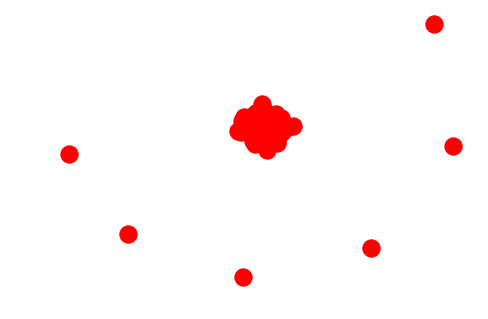

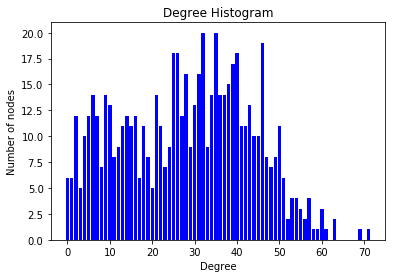

In [131]:
toc = time.time()
   # block_start(t, gamma, kappa, chia, chig, phi, zeta, xi, rho)
g = block_start(100, 0.5, 0.001, 0.5, 0.5, 0.001, 0.005, 0.5, 0.1)
tic = time.time()
print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
print(f"Time taken: {tic-toc}")
nx.draw(g)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

In [ ]:
nodes = 3
gamma = 0.5
kappa = 0.01
def node_add(gamma): 
    num = int((nodes**0.5 * norm(gamma, gamma / 2))//1)
    return [list(range(nodes, nodes+num)), np.random.ranf(num)]

def node_del(gamma): 
    def delnode(node):
        factor = np.random.ranf(1)
        p = gamma / g.degree(node)
        if factor < p:
            return 1
        return 0
    return filter(lambda y: y >=0, list(map(lambda x: x if delnode(x) == 1 else -1, range(nodes))))

In [79]:
num = int(np.rint(nodes**gamma * norm(gamma, gamma)))
print(num)
g = nx.Graph()
g.add_edge(0, 1)
g.add_edge(1, 2)
fitness = list(map(normnorm, range(3)))
node_a = [0, 1, 2]

0
